### Import Packages

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import Data and View Columns

Import data, set time index, and print data columns

In [75]:
filepath = 'C:/Users/bis1abt/Documents/Projects/TestGAN/Auto_Data_Raw.csv'
df = pd.read_csv(filepath)
print(df.shape)
df.head()

(291866, 42)


,time,Absolute load value (%),Absolute pedal position D (%),Altitude (GPS) (feet),Ambient air temperature (℉),Average fuel consumption (MPG),Average fuel consumption (total) (MPG),Average fuel consumption 10 sec (MPG),Average speed (mph),Average speed (GPS) (mph),...,Oxygen sensor 1 Wide Range Current (mA) (mA),Oxygen sensor 1 Wide Range Equivalence ratio (),Power from MAF (hp),Speed (GPS) (mph),Throttle position (%),Vehicle acceleration (g),Vehicle speed (mph),Latitude,Longitude,Unnamed: 41
0,07:50:22.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.249749,-111.635575,NaN
1,07:50:22.266,NaN,NaN,4744.09464,NaN,NaN,NaN,NaN,NaN,2.309839,...,NaN,NaN,NaN,22.548318,NaN,NaN,NaN,40.249749,-111.635575,NaN
2,07:50:22.273,NaN,NaN,4744.09464,NaN,NaN,NaN,NaN,NaN,2.310961,...,NaN,NaN,NaN,22.548318,NaN,NaN,NaN,40.249667,-111.635543,NaN
3,07:50:22.274,NaN,NaN,4744.09464,NaN,NaN,NaN,NaN,NaN,2.311115,...,NaN,NaN,NaN,22.548318,NaN,NaN,NaN,40.249667,-111.635543,NaN
4,07:50:22.306,NaN,NaN,NaN,NaN,6.030337,40.557863,3.621411,NaN,NaN,...,NaN,NaN,13.176,NaN,NaN,NaN,NaN,40.249667,-111.635543,NaN


In [83]:
# Fill Missing Data
data = df
# fill in NaNs - forward fill
data.fillna(method='ffill',inplace=True)
# fill in NaNs - backward fill
data.fillna(method='bfill',inplace=True)

# Extract relevant measurements
data = data.loc[:,['time','Latitude','Longitude','Absolute pedal position D (%)','Vehicle acceleration (g)','Vehicle speed (mph)']]

# Convert the Time column to Timedelta
data['time'] = pd.to_timedelta(data['time'])

# Calculate the difference in seconds relative to the first timestamp
data['Seconds'] = (data['time'] - data['time'].iloc[0]).dt.total_seconds()
# Re-arrange
data = data[['time','Seconds','Latitude','Longitude','Absolute pedal position D (%)','Vehicle acceleration (g)','Vehicle speed (mph)']]
data.reset_index(inplace=True,drop=True)

# Extract every 20th row (approx. 1sec)
data = data.iloc[::20]
# Extract the first 3000 rows
data = data.iloc[:700]
data = data.reset_index(drop=True)

# # Set Seconds as the DataFrame's index
# data.set_index('Seconds', inplace=True)
# # Create a new index with 100-millisecond intervals
# new_index = np.arange(data.index.min(), data.index.max() + 0.5, 0.5)
# # Reindex the DataFrame using the new index and forward-fill missing values
# data = data.reindex(new_index).ffill().reset_index()
# # Rename the index column back to "Seconds"
# data = data.rename(columns={'index': 'Seconds'})

# Create training dataset, rows as timesteps, column only speed, acc, and throttle
traindf = data[['Absolute pedal position D (%)','Vehicle acceleration (g)','Vehicle speed (mph)']]
traindf.to_csv('Auto_Data_Train.csv', index=False)

data.to_csv('Auto_Data_Proc.csv', index=False)
print(data.shape)
data.head(1000)


(700, 7)


,time,Seconds,Latitude,Longitude,Absolute pedal position D (%),Vehicle acceleration (g),Vehicle speed (mph)
0,0 days 07:50:22.160000,0.000,40.249749,-111.635575,15.0,-0.009322,24.233476
1,0 days 07:50:23.812000,1.652,40.249586,-111.635500,15.0,-0.009322,24.233476
2,0 days 07:50:25.570000,3.410,40.249412,-111.635426,15.0,-0.009322,24.233476
3,0 days 07:50:27.282000,5.122,40.249248,-111.635327,15.0,-0.009322,22.369363
4,0 days 07:50:29.280000,7.120,40.249177,-111.635303,15.0,-0.009322,20.505249
...,...,...,...,...,...,...,...
695,0 days 08:12:31.510000,1329.350,40.050866,-111.737711,32.0,-0.003680,74.564543
696,0 days 08:12:33.284000,1331.124,40.050398,-111.738214,30.0,-0.003680,74.564543
697,0 days 08:12:35.301000,1333.141,40.049918,-111.738699,30.0,-0.003680,74.564543
698,0 days 08:12:37.788000,1335.628,40.049449,-111.739184,32.0,0.003156,74.564543


### Plot Data

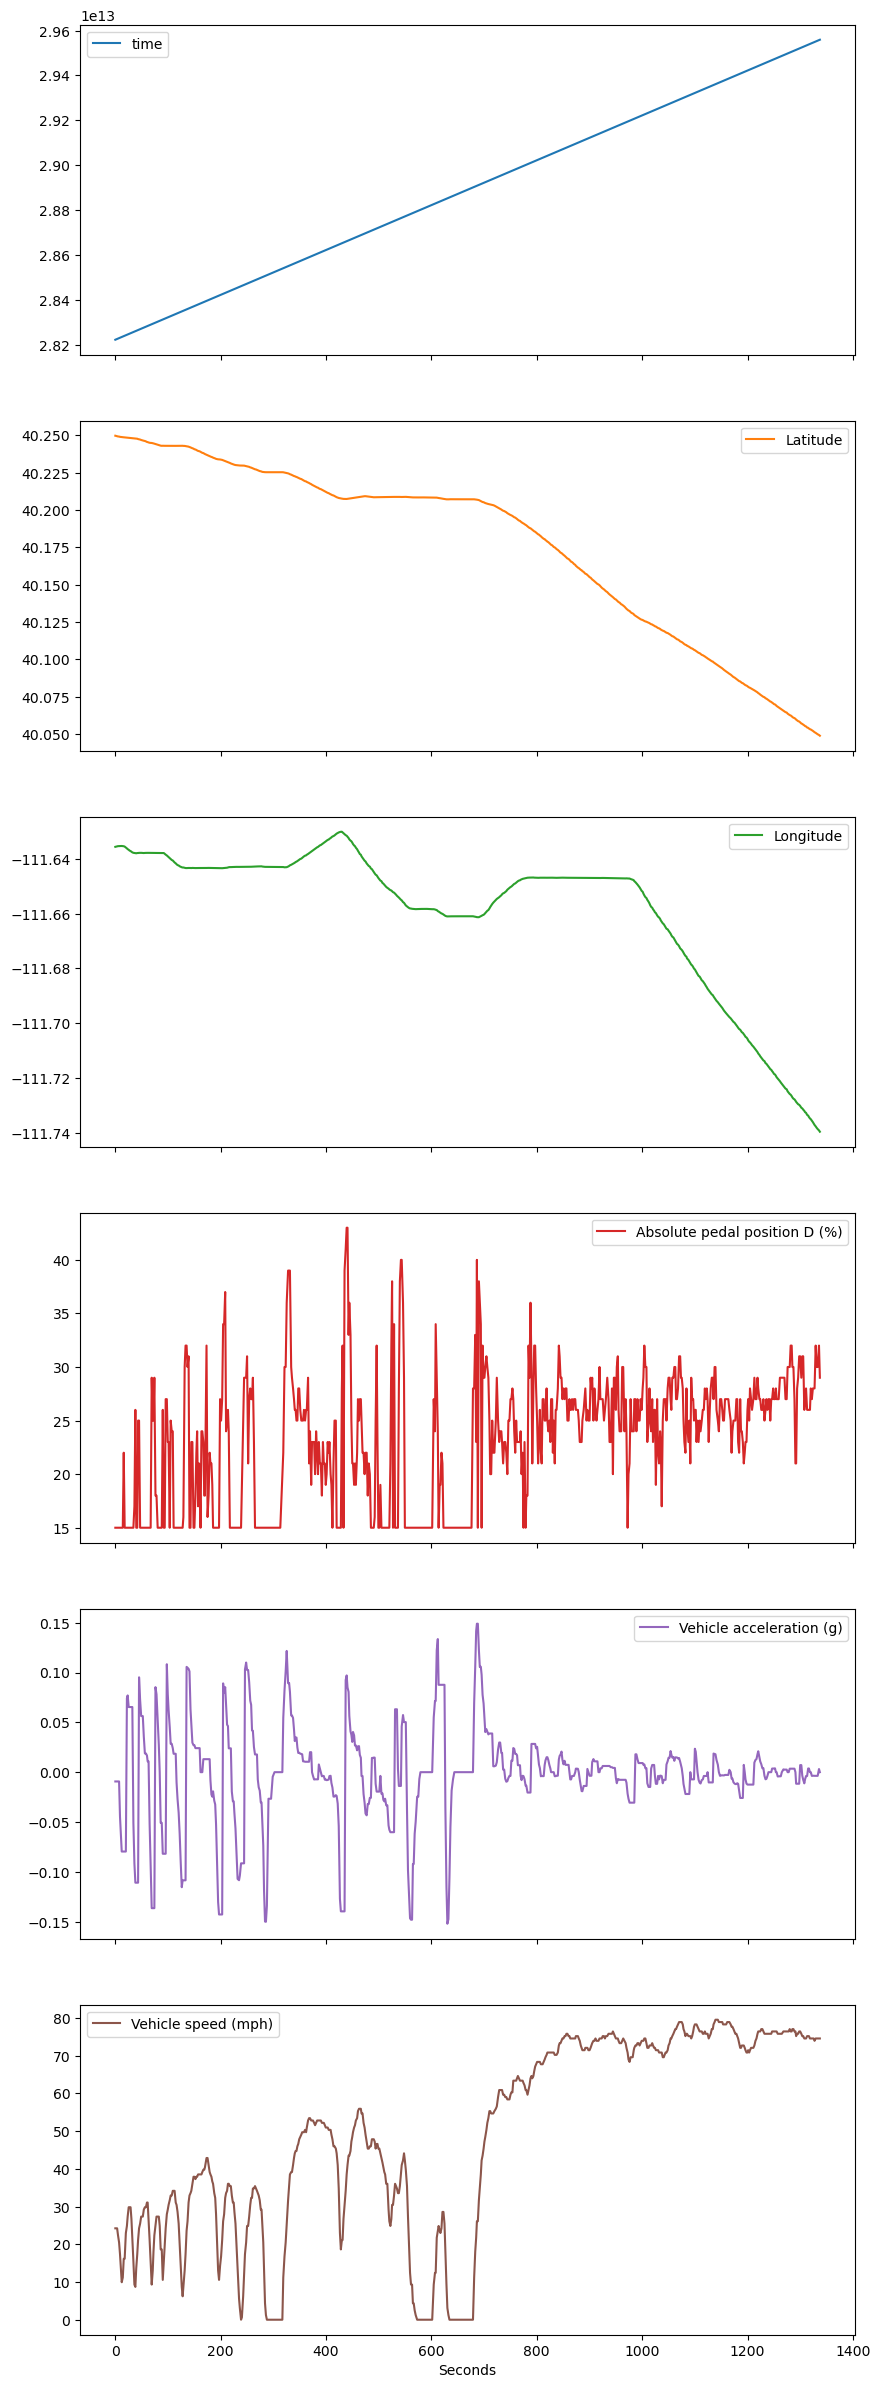

In [82]:
data.plot(x='Seconds',subplots=True,figsize=(10,30))
plt.show()

### View GPS Points on Map

Plot the longitude and latitude on a `matplotlib` plot.

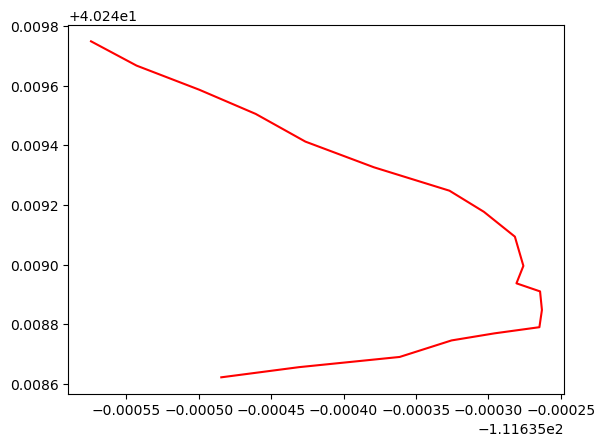

In [50]:
x = data['Longitude'].values
y = data['Latitude'].values

# plot data
plt.plot(x,y,'r-')
plt.show()

### Display GPS with Plotly Express

In [72]:
import plotly.express as px

fig = px.scatter(x=[1, 2, 3, 4], y=[10, 11, 12, 13])
fig.show()
# df = px.data.carshare()
# fig = px.scatter_mapbox(data, lat="Latitude", lon="Longitude", \
#                         color="Vehicle speed (mph)", \
#                         # size="Altitude (GPS) (feet)", \
#                         color_continuous_scale=px.colors.cyclical.IceFire, \
#                         size_max=5, zoom=6)
# fig.update_layout(
#     mapbox_style="open-street-map",
#     margin={"r": 0, "t": 0, "l": 0, "b": 0})
# fig.show()